In [1]:
fname = "/home/goatchurch/datalogging/flightanenv/liftdata.TXT"
#fname = "/media/goatchurch/2F40-1741/OOR/000.TXT"
#fname = "/media/goatchurch/2F40-1741/lOR/000.TXT"
fname = "/home/goatchurch/datalogging/flightanenv/flightloganalysis/liftdata.TXT"



In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from flightjy import loaders, utils

fd = loaders.FlyDat(fname)
fd.LoadC("BFZ")


Made for B 18658 last index 18658
Made for F 16664 last index 16664
BAD VALUES 13 [(0, 'Zt000015C3x0000y0000z0000a0000b0000c0000w0000x0000y0000z0000s0000\n'), (0, 'Zt000015CDx0000y0000z0000a0000b0000c0000w0000x0000y0000z0000s0100\n'), (0, 'Zt000015D7x0000y0000z0000a0000b0000c0000w0000x0000y0000z0000s0200\n')]
Made for Z 36310 last index 36297


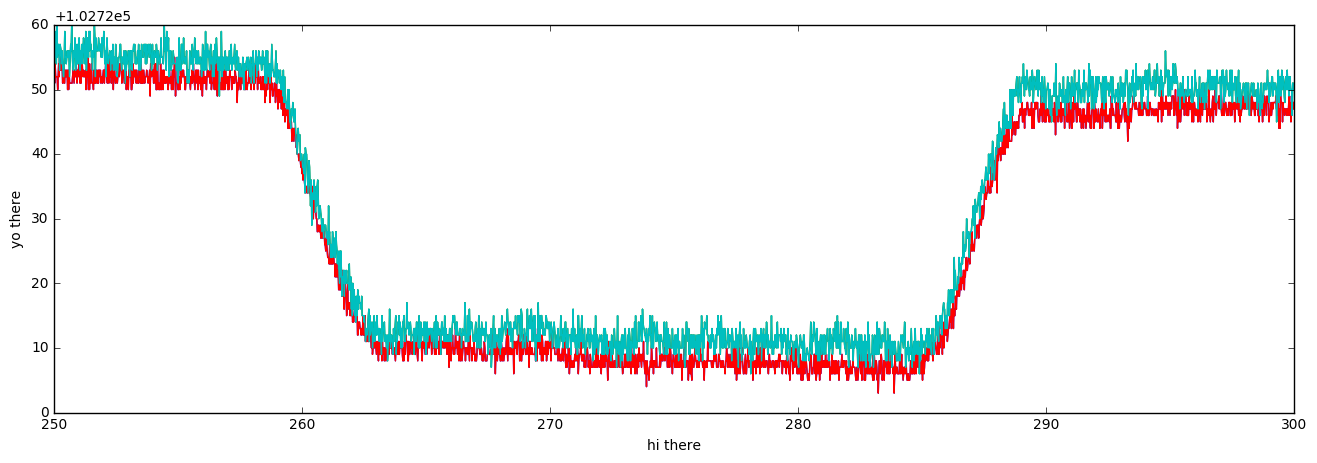

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(16,5))

t0, t1 = 250,300
plt.plot(fd.pB[t0:t1].Prb)
plt.plot(fd.pF[t0:t1].Pr)

import scipy.signal
b, a = scipy.signal.butter(3, 0.003, 'low')

plt.plot(fd.pB[t0:t1].Prb, label="hi there")
plt.plot(fd.pF[t0:t1].Pr, label="poo")
plt.xlabel("hi there")
plt.ylabel("yo there")
#plt.legend(True)


In [19]:
plt.bar?

(0.020056157240272765, 0.021358393848782572, 0.0106928999144568)

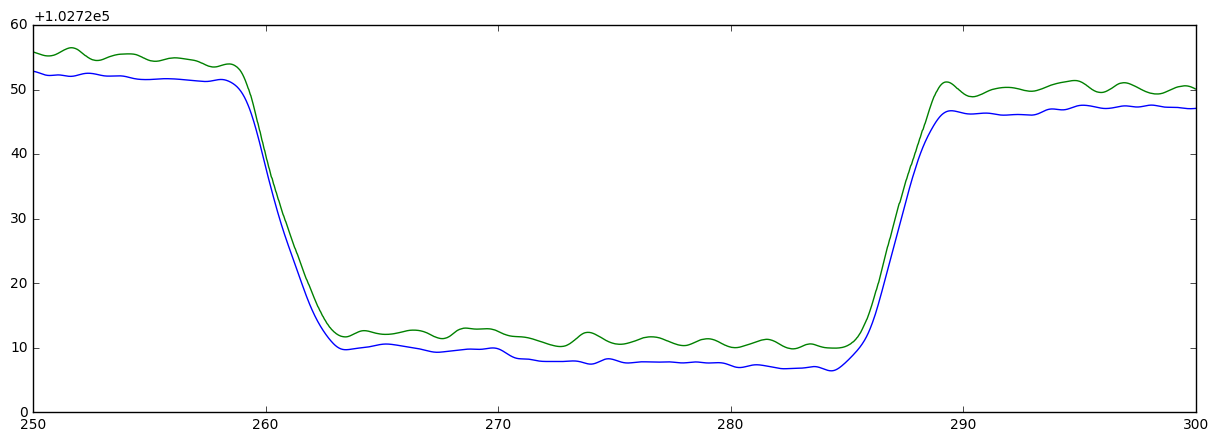

In [5]:
import scipy.signal
import numpy
b, a = scipy.signal.butter(3, 0.03, 'low')

fd.pB["fPrb"] = scipy.signal.filtfilt(b, a, fd.pB.Prb)
fd.pF["fPr"] = scipy.signal.filtfilt(b, a, fd.pF.Pr)

plt.figure(figsize=(15,5))
plt.plot(fd.pB.fPrb[t0:t1])
plt.plot(fd.pF.fPr[t0:t1])
(t1-t0)/len(fd.pB[t0:t1]), (t1-t0)/len(fd.pF[t0:t1]), (t1-t0)/len(fd.pZ[t0:t1])

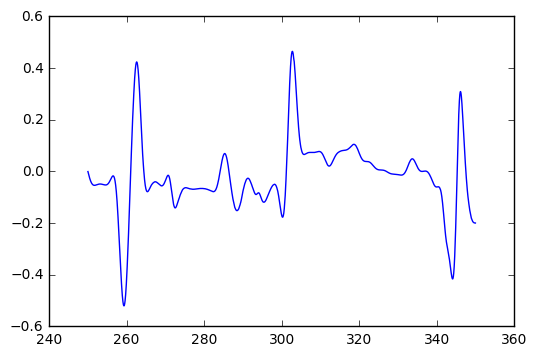

In [25]:
t0, t1 = 250,350

#fd.pZ["az"].plot()
az = fd.pZ[t0:t1].az
b, a = scipy.signal.butter(3, 0.006, 'low')
faz = scipy.signal.filtfilt(b, a, az)
plt.plot(az.index, faz)

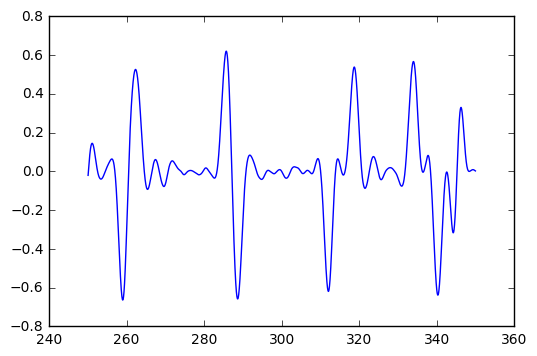

In [46]:
import pandas
pb = fd.pB[t0:t1].Prb

b, a = scipy.signal.butter(3, 0.01, 'low')
fb = pandas.Series(scipy.signal.filtfilt(b, a, pb))

df = fb.diff()*5
#plt.figure(figsize=(15,5))
ddf = df.diff()*50
plt.plot(pb.index, ddf)

#plt.plot(pb.index, fb)


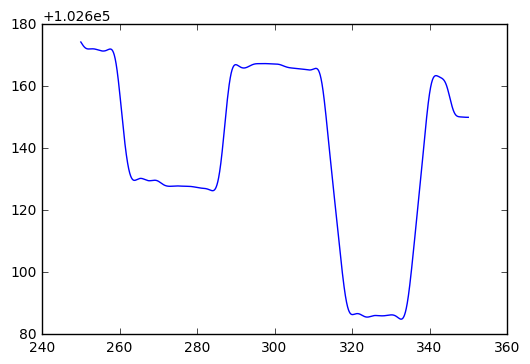

In [45]:
plt.plot(pb.index, fb)

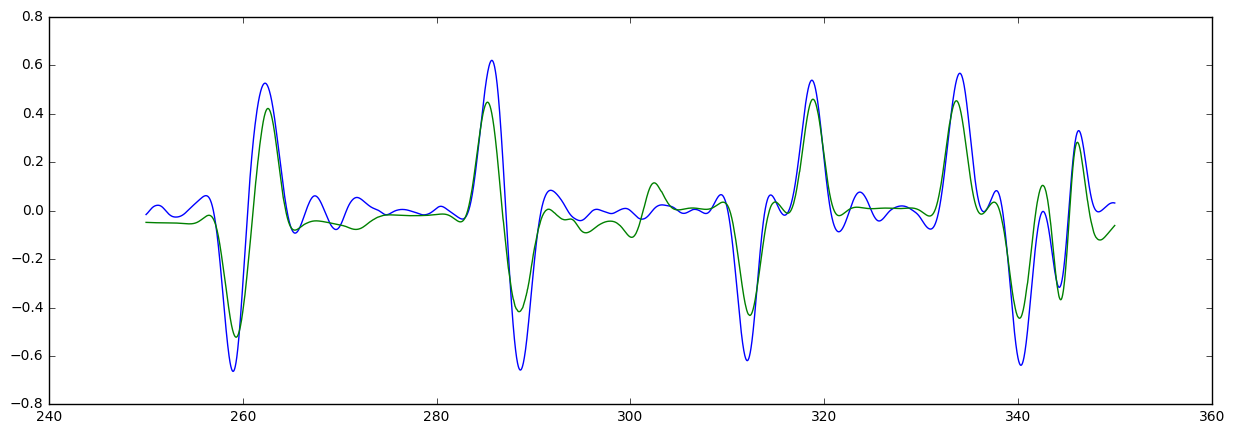

In [5]:

b, a = scipy.signal.butter(3, 0.01, 'low')
fd.pB["fPrb"] = scipy.signal.filtfilt(b, a, fd.pB.Prb)

fd.pB["df"] = fd.pB.fPrb.diff()*5
plt.figure(figsize=(15,5))
fd.pB["ddf"] = fd.pB.df.diff()*50

b, a = scipy.signal.butter(3, 0.006, 'low')
fd.pZ["faz"] = scipy.signal.filtfilt(b, a, fd.pZ.az)
fd.pZ["ag"] = -(fd.pZ.gx*fd.pZ.ax + fd.pZ.gy*fd.pZ.ay + fd.pZ.gz*fd.pZ.az)/9.8
fd.pZ["fag"] = scipy.signal.filtfilt(b, a, fd.pZ.ag)

t0, t1 = 250,350
plt.plot(fd.pB[t0:t1].ddf)
plt.plot(fd.pZ[t0:t1].fag)

None

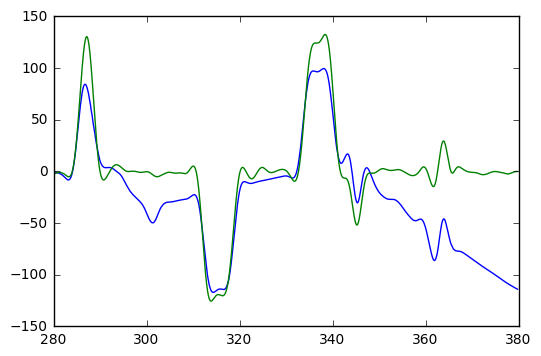

In [6]:
plt.plot(fd.pZ[280:t1+100].fag.cumsum())
plt.plot(fd.pB.df[280:t1+100]*100)


In [ ]:
pF["dfpr"] = pF["fpr"].diff

In [13]:
max(pF.Pr)

16775807.0

In [12]:
#fd.pZ["ag"] = -(fd.pZ.gx*fd.pZ.ax + fd.pZ.gy*fd.pZ.ay + fd.pZ.gz*fd.pZ.az)/9.8



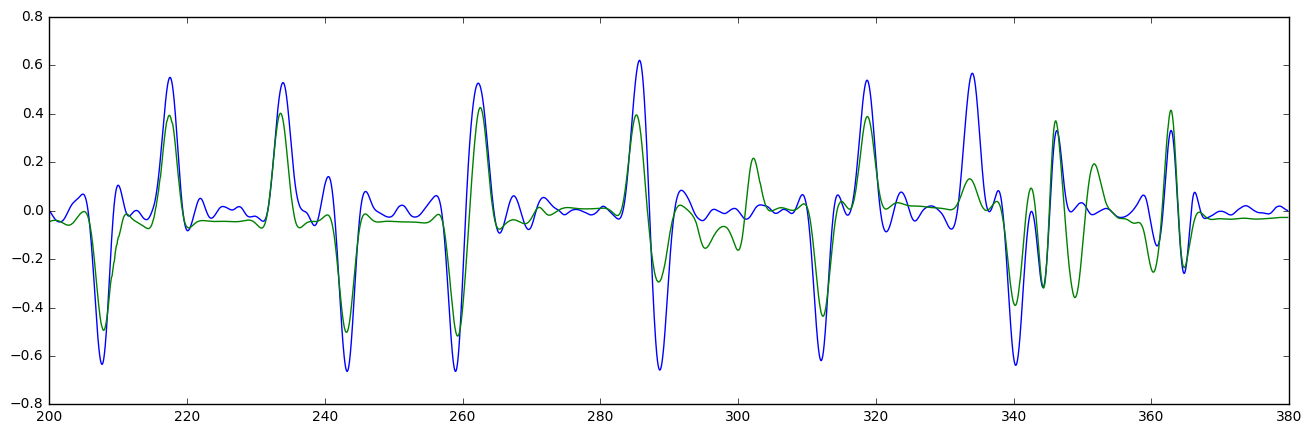

In [19]:
plt.figure(figsize=(16,5))
fd.pZ["fvz"] = scipy.signal.filtfilt(b, a, fd.pZ.vz)

t0, t1 = 200,390
plt.plot(fd.pB[t0:t1].ddf)
plt.plot(-fd.pZ[t0:t1].fvz)


In [64]:
t0, t1 = kk[0][0], kk[-1][0]
pV.iloc[-1][0], t0, t1

(6240.5540000000001, 4708.5950000000003, 4726.2650000000003)